## Загрузим данные

In [1]:
# Импорт библиотек
import pandas as pd
import math as mth
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

#визуализация
import seaborn as sns; sns.set()

data = pd.read_csv('/datasets/bank_dataset.csv')
data.head(5)

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [3]:
data.describe()

,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.573368e+07,650.528800,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.585843e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## Предобработка

In [4]:
print(data['Balance'].isnull().sum())
print('В столбце Balance {} % пропусков'. format(data['Balance'].isnull().sum()/len(data)*100))

3617
В столбце Balance 36.17 % пропусков


In [5]:
# Приведём к нижнему регистру названия столбцов
data.columns = [col.lower() for col in data.columns]
# Немного откорректируем названия 
data = data.rename(columns = {'userid':'user_id','creditcard':'credit_card'})
data.columns

Index(['user_id', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'credit_card', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

In [6]:
# Проверим на дубликаты
data.duplicated().sum()

0

**Итоги по предобработке:**  
•	Пропуски только в столбце Balance (баланс на счёте) - 3617.  
•	Дубликаты отсутствуют  

В столбце Balance 36,17% пропусков, игнорировать и удалить такое количество пропусков будет некорректно, придётся выяснить их причину

###  "balance"

In [7]:
data.groupby('products')['balance'].apply(lambda x :x.isna().sum())

products
1     905
2    2600
3      98
4      14
Name: balance, dtype: int64

Больше всего пропусков в группе с двумя продуктами

In [8]:
data.groupby('churn')['balance'].apply(lambda x :x.isna().sum())

churn
0    3117
1     500
Name: balance, dtype: int64

ПРопуски у ушедших клиентов

In [9]:
data.groupby('city')['balance'].apply(lambda x :x.isna().sum())

city
Ростов Великий       0
Рыбинск           1199
Ярославль         2418
Name: balance, dtype: int64

In [10]:
data['city'].value_counts()

Ярославль         5014
Ростов Великий    2509
Рыбинск           2477
Name: city, dtype: int64

Ростов без пропусков, в других городах пропуски имеет почти половина данных -  из города Ярославль(48.2%) и Рыбинск (48.4%) 

In [11]:
data.groupby('gender')['balance'].apply(lambda x :x.isna().sum())

gender
Ж    1654
М    1963
Name: balance, dtype: int64

In [12]:
data.groupby('loyalty')['balance'].apply(lambda x :x.isna().sum())

loyalty
0    1744
1    1873
Name: balance, dtype: int64

In [13]:
data.groupby('credit_card')['balance'].apply(lambda x :x.isna().sum())

credit_card
0    1025
1    2592
Name: balance, dtype: int64

Пропуски у клиентов, у которых нет дебетового счета

Заменить пропуски на среднее или медиану будет не очень, это исказит дальнейшие вычисления, слишком большой процент. Поставим 0

In [14]:
data.fillna(0)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,15677338,619,Ярославль,Ж,42,2,0.00,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,0.00,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,0.00,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,0.00,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


## Проведём исследовательский анализ данных

In [15]:
data.drop(['user_id'], axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
score,10000.0,650.528800,96.653299,350.00,584.000,652.000,718.0000,850.00
age,10000.0,38.921800,10.487806,18.00,32.000,37.000,44.0000,92.00
objects,10000.0,5.012800,2.892174,0.00,3.000,5.000,7.0000,10.00
balance,6383.0,119827.493793,30095.056462,3768.69,100181.975,119839.690,139512.2900,250898.09
products,10000.0,1.530200,0.581654,1.00,1.000,1.000,2.0000,4.00
credit_card,10000.0,0.705500,0.455840,0.00,0.000,1.000,1.0000,1.00
loyalty,10000.0,0.515100,0.499797,0.00,0.000,1.000,1.0000,1.00
estimated_salary,10000.0,100090.239881,57510.492818,11.58,51002.110,100193.915,149388.2475,199992.48
churn,10000.0,0.203700,0.402769,0.00,0.000,0.000,0.0000,1.00


###   столбчатые гистограммы по признакам  (ушли, остались)

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


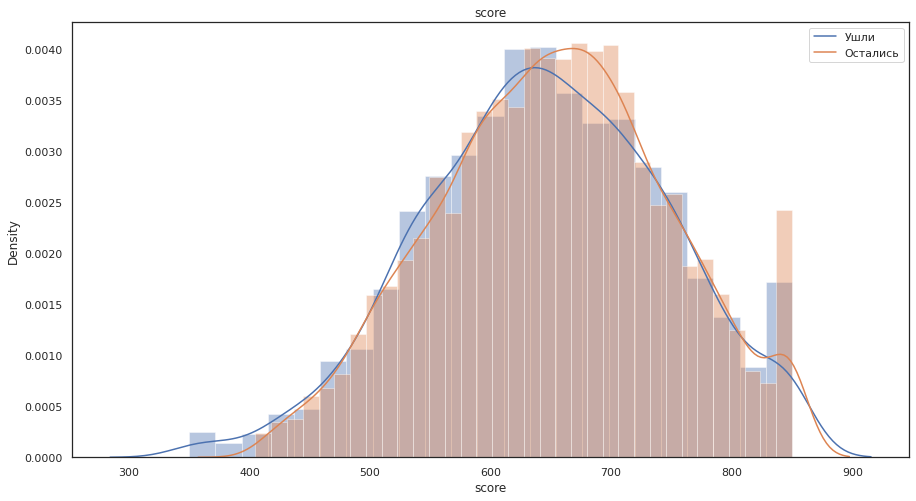

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


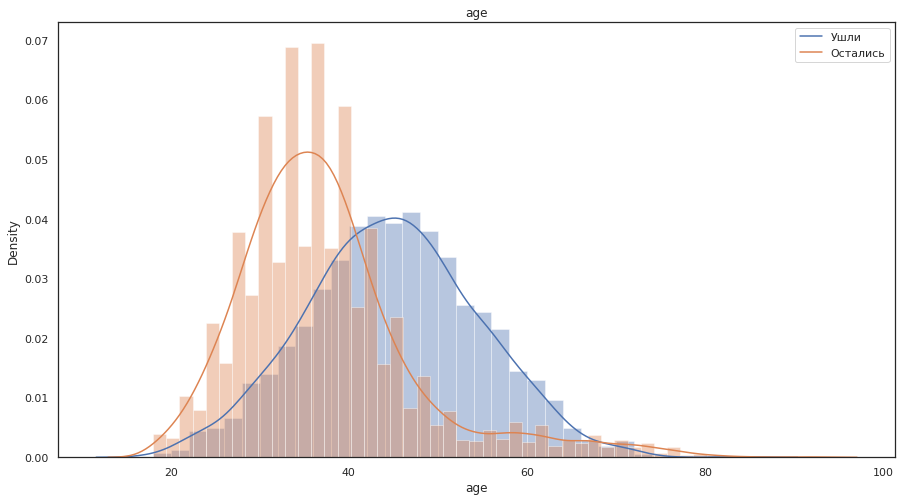

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


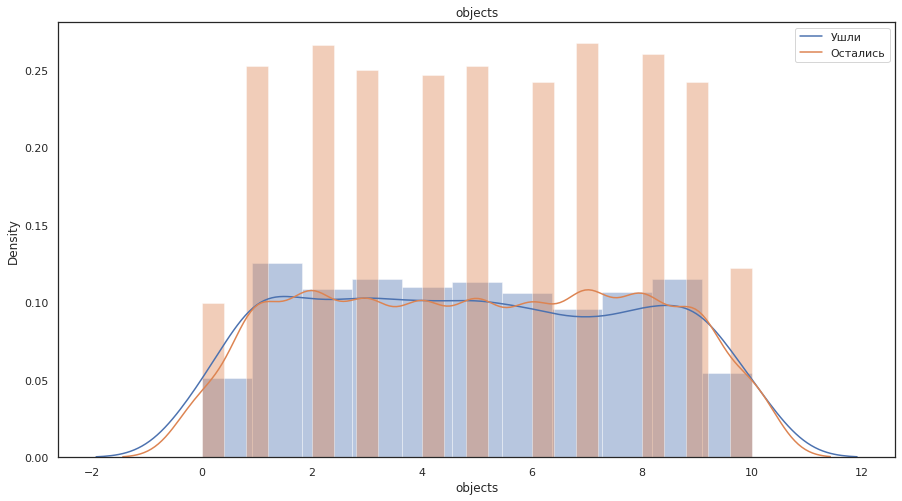

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


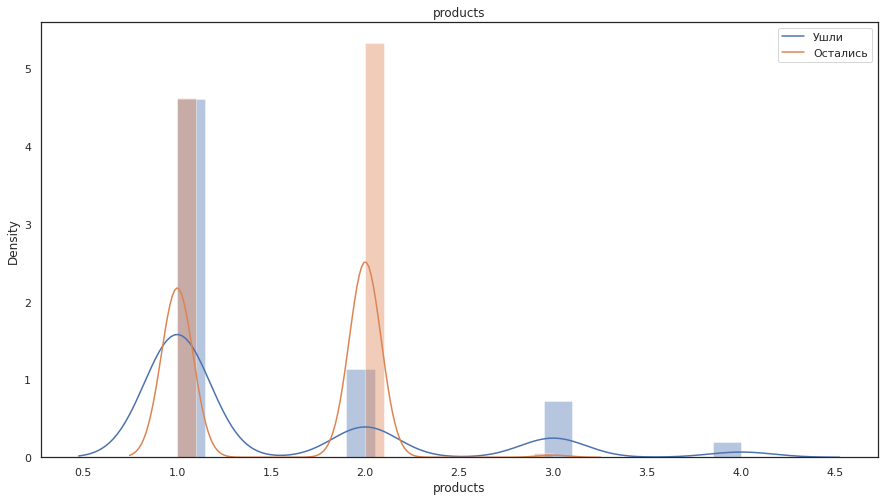

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


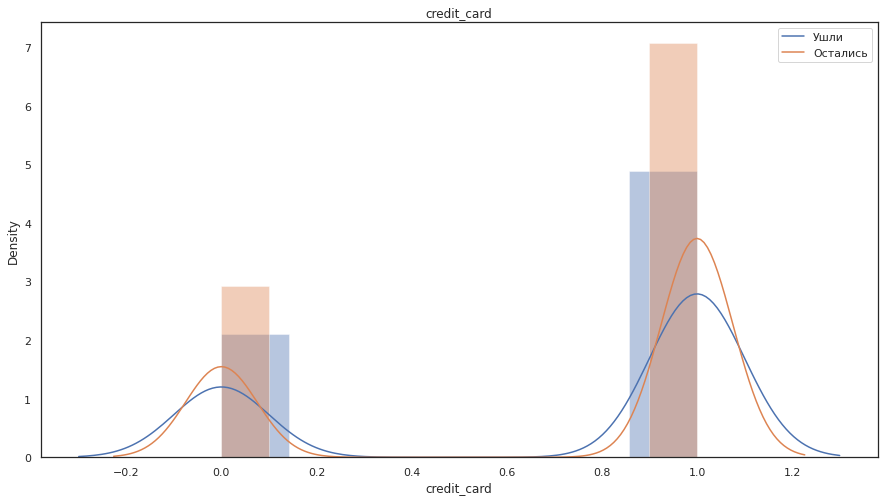

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


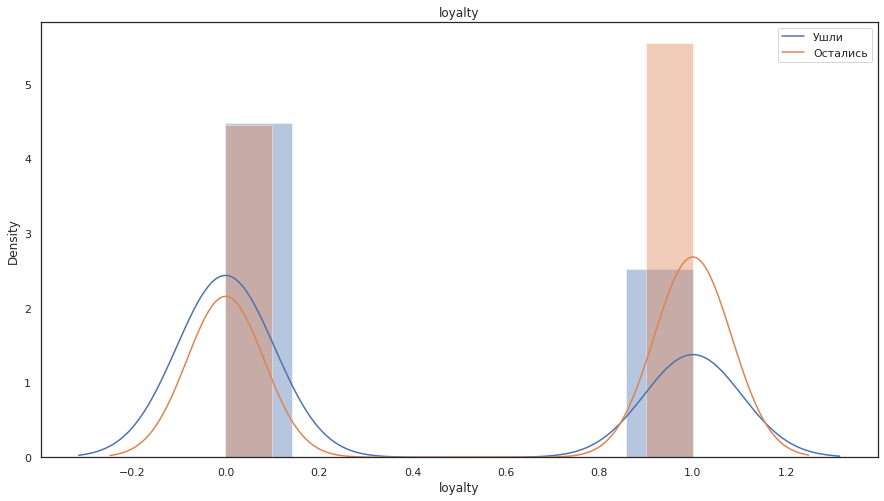

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


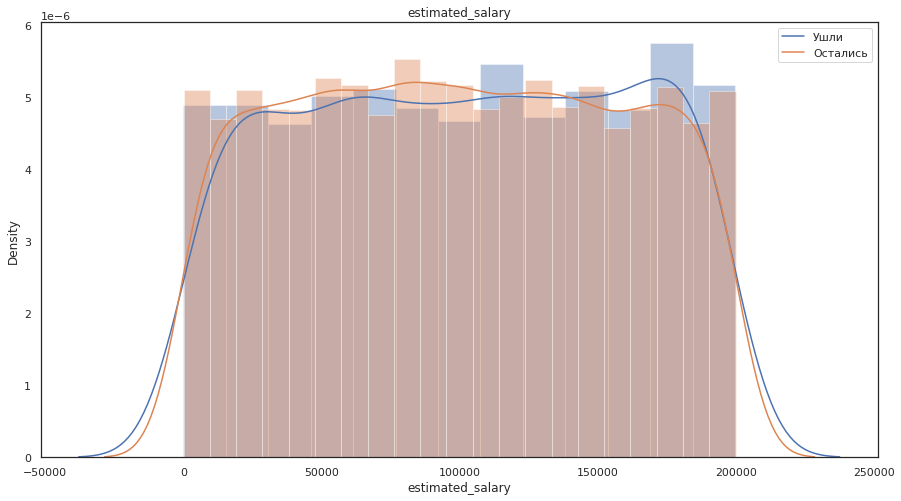

In [35]:

escape = data[data['churn']== 1]
stay = data[data['churn']== 0]
columns = ['score', 'age', 
                    'objects', 'products', 
                    'credit_card', 'loyalty','estimated_salary']
for column in columns: 
    plt.figure(figsize=(15,8)) 
    plt.title(column)
    sns.distplot(escape[column])
    sns.distplot(stay[column])
    plt.legend(['Ушли', 'Остались'])
    plt.show()

### Распределение по признакам

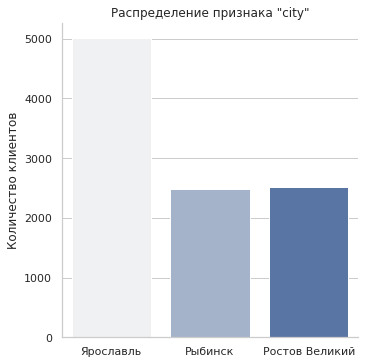

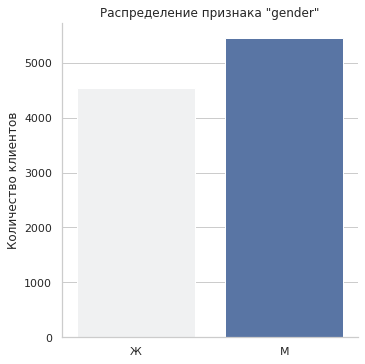

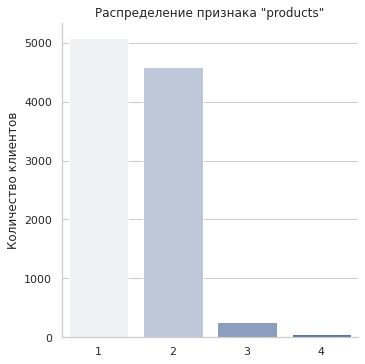

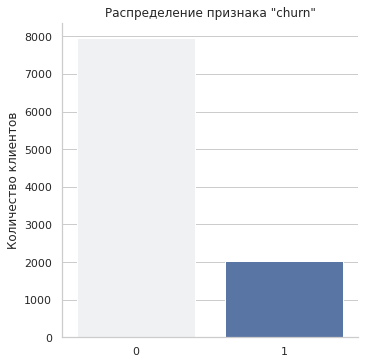

In [17]:
columns_name = dict(zip(data.columns,data))
df_cat = data[['city', 'gender', 'products', 'churn']]
with sns.axes_style("whitegrid"):
    for col in df_cat.columns:
        sns.catplot(x=col, kind='count', palette="light:b", data=data)
        plt.title(f'Распределение признака "{columns_name[col]}"')
        plt.xlabel('')
        plt.ylabel('Количество клиентов')
        plt.grid(True, axis='y')
        plt.show()

In [18]:
data.drop(['user_id'], axis=1).groupby('churn').agg(['count','mean']).T

churn                               0              1
score            count    7963.000000    2037.000000
                 mean      651.853196     645.351497
age              count    7963.000000    2037.000000
                 mean       37.408389      44.837997
objects          count    7963.000000    2037.000000
                 mean        5.033279       4.932744
balance          count    4846.000000    1537.000000
                 mean   119535.864270  120746.971132
products         count    7963.000000    2037.000000
                 mean        1.544267       1.475209
credit_card      count    7963.000000    2037.000000
                 mean        0.707146       0.699067
loyalty          count    7963.000000    2037.000000
                 mean        0.554565       0.360825
estimated_salary count    7963.000000    2037.000000
                 mean    99738.391772  101465.677531

Итоги ИАД:   
•	score ( баллы кредитного скоринга)- данный признак распределён практически без особой разницы в двух группах(ушли, остались) 
•	city (город)- больше всего  клиентов в Ярославле, в Рыбинске и Ростове разница не большая
•	gender (пол)- мужчин немного больше женщин  
•	age (возраст) -средний возраст 39 лет, активный отток наблюдается среди клиентов кому немного за 40,  
•	objects (количество объектов в собственности) – в среднем у  клиентов по 5 объектов собственности. У ушедших и оставшихся сильных различий нет 
•	products (количество продуктов, которыми пользуется клиент) – большая часть клиентов пользуется 1 или 2 продуктами банка  
•	credit_card (есть ли кредитная карта) – 70% клиентов обладатели кредитных карт, здесь тоже нет собой разницы между ушедшими и оставшимся   
•	loyalty (активный клиент) – лояльных клиентов больше
•	estimated_salary (заработная плата клиента) – средняя зп, примерно, 100 т.р.. Данный параметр не имеет сильно значимых различий между двумя группами  
•	city (город) –  клиенты из Ярославля, Рыбинска, Ростова Великого. 50% находится в Ярославле, 25% Рыбинск, 25% Ростов Великий 
•	gender (пол) -  больше половины клиентов - мужчины
•	churn (ушёл или нет ) – 20 % клиентов попали в группу оттока. 


### Матрица коррелиции

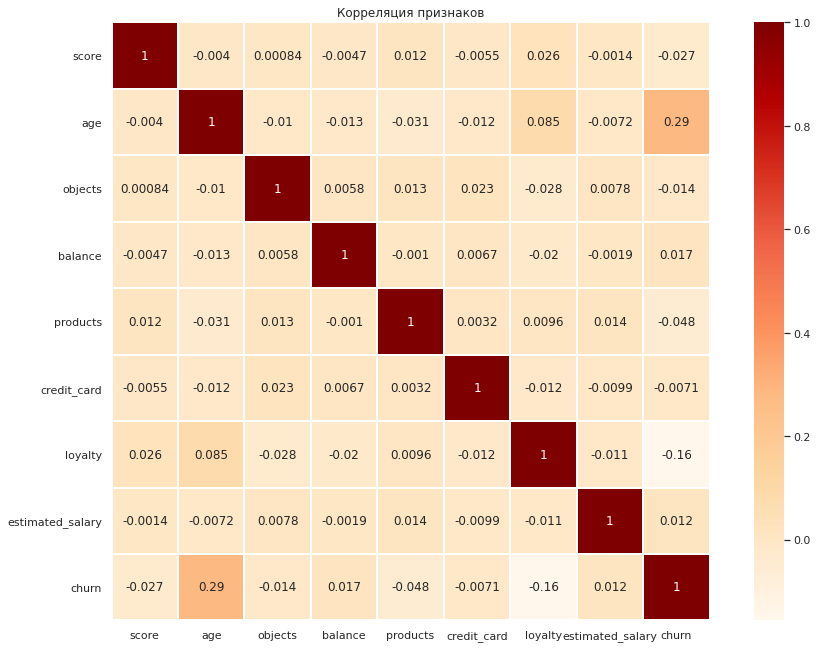

In [19]:
# Построим матрицу корреляций
df = data.drop(['user_id'], axis=1).corr() 

sns.set(style='white')
plt.figure(figsize=(16, 11))
plt.title('Корреляция признаков')
sns.heatmap(df, annot = True, square=True,linewidths=1,cmap="OrRd" )
plt.show()

Наибольшая корреляция между возрастом и оттоком. Порог явной корреляции 0,3 не перешел ни один из признаков

##  Сегментируем пользователей 

Разделим данные по количеству используемых продуктов, в описании назовём их группа 1, 2,3 и 4

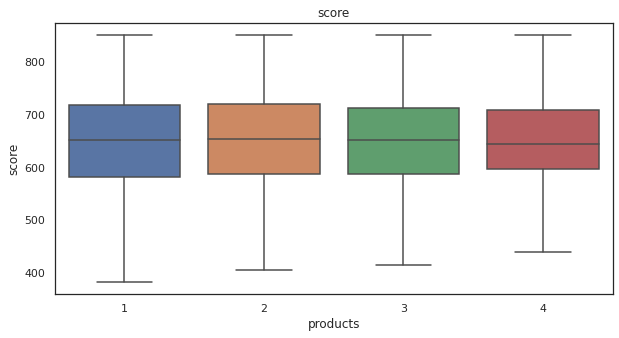

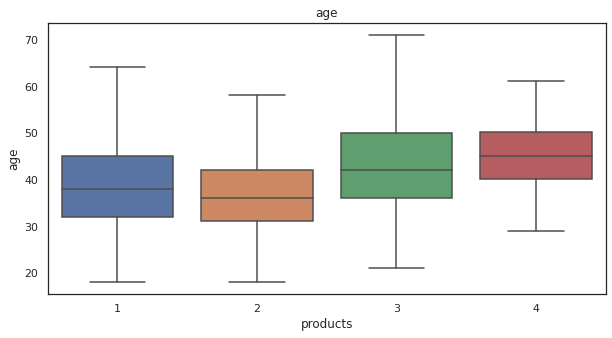

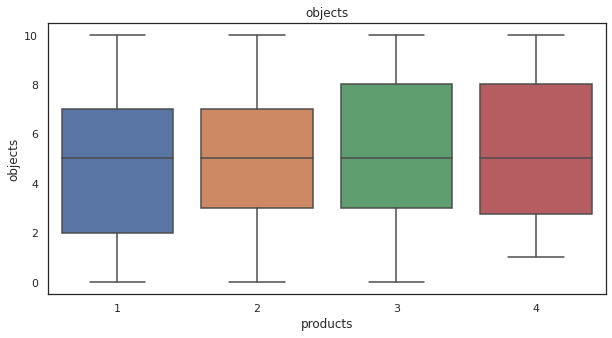

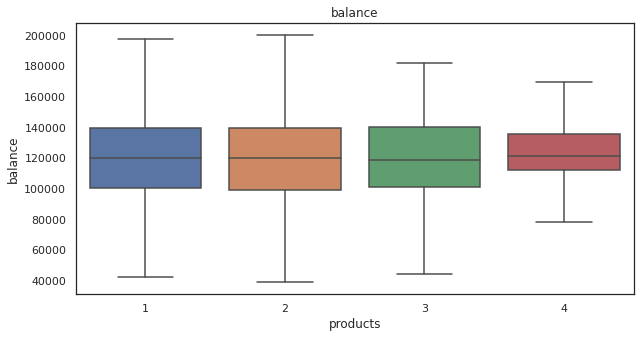

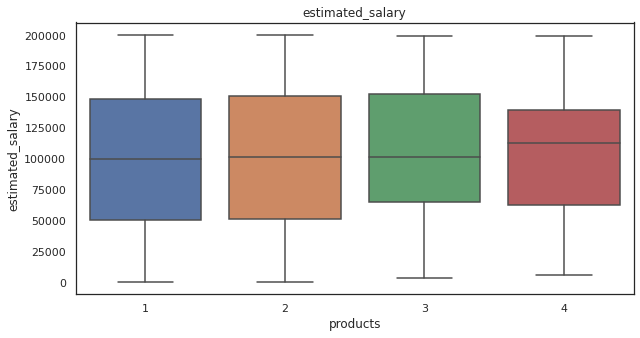

In [20]:
for i in ['score', 'age', 'objects', 'balance','estimated_salary']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x='products',y=i, data=data,showfliers=False).set_title(i)
    plt.show() 

В разрезе по признаку «products»:  
Межквартильный размах и медиана у всех групп не имеет больших различий. Ширина диапазона не позволяет выделить явных лидеров по группам

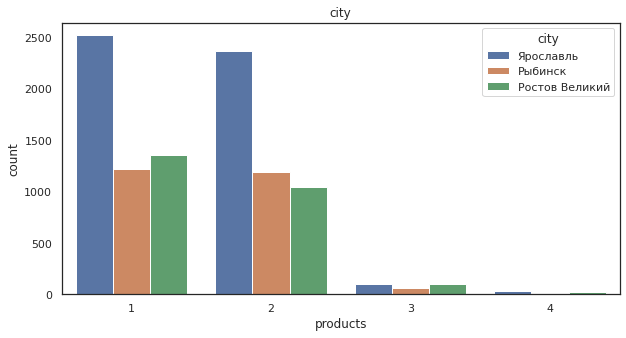

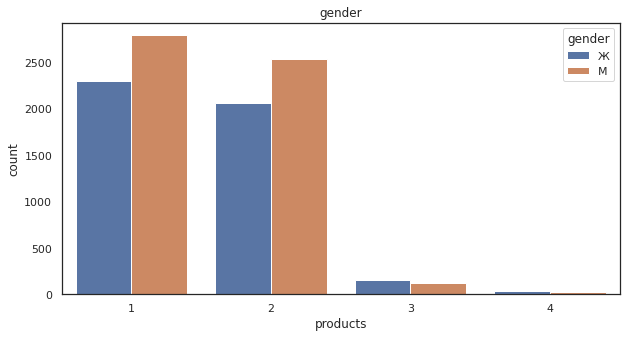

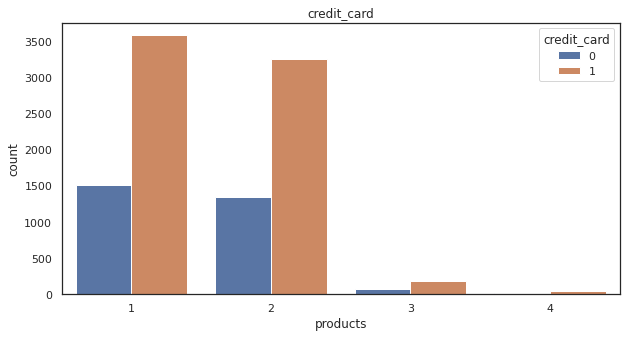

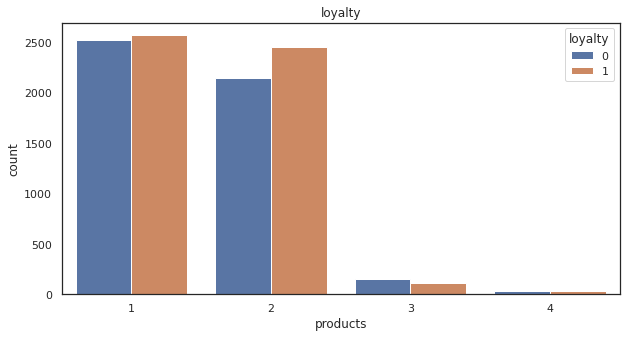

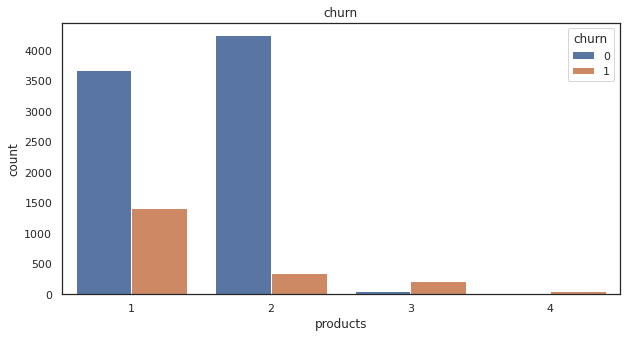

In [21]:
for i in ['city', 'gender', 'credit_card', 'loyalty', 'churn']:
    plt.figure(figsize=(10,5))
    sns.countplot(x='products', hue=i, data=data).set_title(i)
    
    plt.show()

Сделаем описание графиков

In [22]:
pivot_credit = data.pivot_table(index= ['products'], columns= 'credit_card',values='loyalty',aggfunc='count')
pivot_credit

credit_card,0,1
products,,
1,1506,3578
2,1344,3246
3,76,190
4,19,41


In [23]:
pivot_city = data.pivot_table(index= ['products'], columns= 'city',values='loyalty',aggfunc='count')
pivot_city

city,Ростов Великий,Рыбинск,Ярославль
products,,,
1,1349,1221,2514
2,1040,1183,2367
3,96,66,104
4,24,7,29


In [24]:
pivot_gender = data.pivot_table(index= ['products'], columns = 'gender',values='loyalty',aggfunc='count')
pivot_gender

gender,Ж,М
products,,
1,2296,2788
2,2060,2530
3,149,117
4,38,22


In [25]:
pivot_loyalty = data.pivot_table(index= ['products'], columns = 'loyalty',values='churn',aggfunc='count')
pivot_loyalty

loyalty,0,1
products,,
1,2521,2563
2,2144,2446
3,153,113
4,31,29


In [26]:
pivot_churn = data.pivot_table(index= ['products'], columns = 'churn',values='loyalty',aggfunc='count')
pivot_churn['% оттока'] = pivot_churn[1]/(pivot_churn[1] + pivot_churn[0]) * 100
pivot_churn

churn,0,1,% оттока
products,,,
1,3675.0,1409.0,27.714398
2,4242.0,348.0,7.581699
3,46.0,220.0,82.706767
4,NaN,60.0,NaN


Описание данных в разрезе по признаку «products»:  

Из графиков видно, что подавляющее большинство клиентов пользуется 1 или 2 продуктами:
1 группа:
Большая часть клиентов из Ярославля.
Мужчин немного больше, чем женщин
Больше половины являются держателями кредитных карт  
Лояльных и не лояльных клиентов почти одинаковое количество  
Отток 27,7%

2 Группа:    
Большая часть клиентов из Ярославля.  
Мужчин немного больше, чем женщин  
Больше половины являются держателями кредитных карт  
Лояльных клиентов больше  
Отток 7,6%


## Гипотезы

### Проверим первую гипотезу о различиях в доходах между теми клиентами, которые пользуются двумя продуктами банка, и теми, которые пользуются одним

H0: между группами есть статистически значимое различие в доходах

H1: между клиентами первой и второй группой нет статистически значимого различия в доходах

In [27]:
products_1 = data.query('products == 1')['estimated_salary']
products_2 = data.query('products == 2')['estimated_salary']

In [28]:
alpha = 0.05  

results = sps.mannwhitneyu(products_1,products_2)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: ЕСТЬ статистически значимое различие в доходах ')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу:  НЕТ статистически значимого различия в доходах '
    ) 

p-значение:  0.4079566651927651
Не получилось отвергнуть нулевую гипотезу:  НЕТ статистически значимого различия в доходах 


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


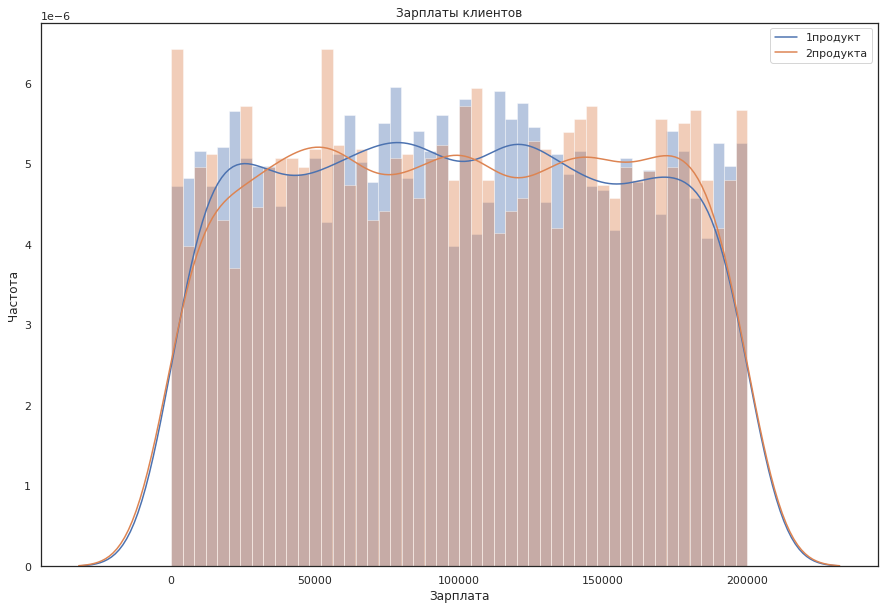

In [29]:
plt.figure(figsize=(15, 10))  
sns.distplot(products_1,bins=50)
sns.distplot(products_2,bins=50)
plt.legend(['1продукт', '2продукта'])
plt.title('Зарплаты клиентов')
plt.xlabel("Зарплата") 
plt.ylabel("Частота"); 

In [30]:
print('Среднее доходов 1 группы: {}'.format(round(products_1.mean(),2)))
print('Среднее доходов 2 группы: {}'.format(round(products_2.mean(),2)))      

Среднее доходов 1 группы: 99487.26
Среднее доходов 2 группы: 100452.01


Результат проверки первой гипотезы - доходы лояльных клиентов в группах оттока и оставшихся статистически значимых различий не имеет

### Вторая гипотеза


Н0: В группах оттока доли лояльных и не лояльных клиентов одинаковы

Н1: В группах оттока доли лояльных и не лояльных клиентов различаются

In [31]:
churn_0 = data.query('churn == 0')['loyalty'] #оставшиеся
churn_1 = data.query('churn == 1')['loyalty'] #отток

In [32]:
def z_test(a, i, alpha):

    group = data[a].value_counts() 
    churn_size = data.groupby(i)[a].sum() 
 

    p = churn_size / group
    p_combined = churn_size.sum() / group.sum()
    
    # разница пропорций в датасетах
    difference = p[0] - p[1]
 
    # считаем статистику в ст.отклонениях стандартного нормального распределения
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/group[0] + 1/group[1]))
 
    # задаем стандартное нормальное распределение (среднее 0, ст.отклонение 1)
    distr = sps.norm (0,1 ) 
 
    p_value = (1 - distr.cdf(abs(z_value))) * 2
 
    print('Уровень значимости:{}'.format(alpha))
    print('p-значение: {0:.15f}'.format(p_value))

    if (p_value < alpha):    
        print('Отвергаем нулевую гипотезу: статистически значимое различие в долях ЕСТЬ')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, статистически значимых различий в долях НЕТ ')
z_test('churn', 'loyalty', .05)

Уровень значимости:0.05
p-значение: 0.000000000000000
Отвергаем нулевую гипотезу: статистически значимое различие в долях ЕСТЬ


/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


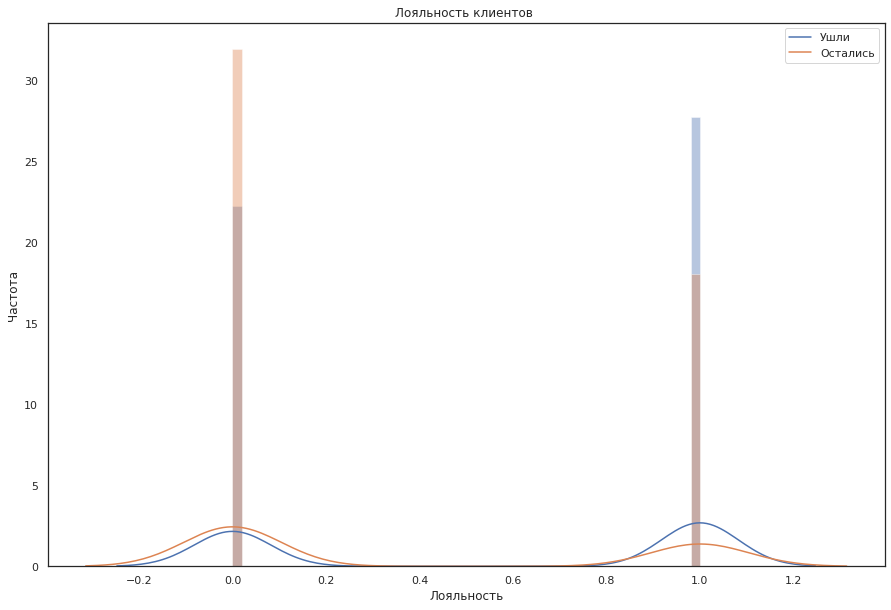

In [33]:
plt.figure(figsize=(15, 10))  
sns.distplot(churn_0,bins=50)
sns.distplot(churn_1,bins=50)
plt.legend(['Ушли', 'Остались'])
plt.title('Лояльность клиентов ')
plt.xlabel('Лояльность') 
plt.ylabel('Частота');

В результате проверки второй гипотезы выяснилось, что разница в доли лояльных и не лояльных клиентов, в группах ушедших и оставшихся имеет статистически значимые различия.

## Вывод:

Мы выяснили, что большинство клиентов используют 1 или 2 продукта. Клиенты, которые используют два продукта, имеют наименьший процент оттока 7,6%.
Портрет клиента из второй группы - это лояльный банку мужчина 37 лет с зп в 100 000р, имеющий кредитную карту, проживающий в Ярославле.

Исходя из "портрета" выше стоит обратить внимание и подготовить  предложения:  
- жителям городов Ростов Великий и Рыбинск, города отстают по количеству клиентов;
- клиенты старше 45 лет (возможно, после 40 снижается процент одобрения по кредитам, а у самых лояльных клиентов обычно есть кредитка)




Презентация: https://disk.yandex.ru/i/YIm8QDSTkQT6xQ
